## Evaluation of the datasets with CICFlowmeter

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir=root_dir+'proyecto_grado_redes/evaluation_datasets/'

Mounted at /content/gdrive


In [2]:
import pandas as pd

## Reading the dataset

In [3]:
df_trabid_normal_org=pd.read_csv(base_dir+"csv_original/trabid_probe_known_services_pcap_Flow.csv")
df_trabid_normal_org['Label'] = df_trabid_normal_org['Label'].map({'NeedManualLabel': 'Normal'})
df_trabid_normal_org.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.0.16-192.168.0.200-38079-80-6,192.168.0.16,38079,192.168.0.200,80,6,02/12/2014 10:14:59 AM,42871,176,282,121.0,142040.0,121.0,0.0,0.687500,9.120718,512.0,0.0,503.687943,63.040080,3.316018e+06,10683.212428,93.809628,181.372439,3170.0,1.0,42338.0,241.931429,380.259721,4091.0,2.0,41809.0,148.786477,249.268911,3170.0,6.0,0,0,0,0,...,0.0,512.0,309.718954,250.088320,62544.167566,2,2,0,1,457,0,0,0,1.0,310.395197,0.687500,503.687943,0,0,0,142161,279,3664037,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
1,192.168.0.20-192.168.0.200-43949-80-6,192.168.0.20,43949,192.168.0.200,80,6,02/12/2014 10:15:00 AM,64192,285,466,121.0,236074.0,121.0,0.0,0.424561,7.167421,512.0,0.0,506.596567,51.969183,3.679508e+06,11699.277168,85.589333,121.050263,1364.0,1.0,63672.0,224.197183,276.862960,2333.0,1.0,63522.0,136.606452,182.044880,1723.0,3.0,0,0,0,0,...,0.0,512.0,314.089096,249.309339,62155.146512,2,2,0,1,750,0,0,0,1.0,314.507324,0.424561,506.596567,0,0,0,236195,463,3902823,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
2,192.168.0.20-192.168.0.200-58592-80-6,192.168.0.20,58592,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8186,47,52,121.0,23062.0,121.0,0.0,2.574468,17.649664,512.0,0.0,443.500000,161.635210,2.832030e+06,12093.818715,83.530612,179.197075,1277.0,1.0,7718.0,167.782609,333.312327,1951.0,1.0,8122.0,159.254902,274.155492,1277.0,3.0,0,0,0,0,...,0.0,512.0,231.830000,250.263419,62631.778889,2,2,0,1,98,0,0,0,1.0,234.171717,2.574468,443.500000,0,0,0,23183,49,4017850,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
3,192.168.0.20-192.168.0.200-46774-80-6,192.168.0.20,46774,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8530,49,56,121.0,25178.0,121.0,0.0,2.469388,17.285714,512.0,0.0,449.607143,153.528402,2.965885e+06,12309.495897,82.019231,183.520639,1384.0,1.0,8043.0,167.562500,346.744428,2096.0,1.0,8501.0,154.563636,267.331793,1384.0,3.0,0,0,0,0,...,0.0,512.0,238.669811,250.583043,62791.861366,2,2,0,1,104,0,0,0,1.0,240.942857,2.469388,449.607143,0,0,0,25299,53,3925977,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
4,192.168.0.23-192.168.0.200-34240-80-6,192.168.0.23,34240,192.168.0.200,80,6,02/12/2014 10:15:01 AM,16068,64,84,121.0,40799.0,121.0,0.0,1.890625,15.125000,512.0,0.0,485.702381,110.660969,2.546677e+06,9210.853871,109.306122,188.688466,1497.0,3.0,15366.0,243.904762,410.845262,2476.0,3.0,14670.0,176.746988,247.321349,1524.0,66.0,0,0,0,0,...,0.0,512.0,274.630872,254.809451,64927.856067,2,2,0,1,147,0,0,0,1.0,276.486486,1.890625,485.702381,0,0,0,40920,81,3475749,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal


In [4]:
df_trabid_normal_org.shape

(113517, 84)

In [5]:
df_trabid_attack_org=pd.read_csv(base_dir+"csv_original/trabid_probe_known_attacks_pcap_Flow.csv")
df_trabid_attack_org['Label'] = df_trabid_attack_org['Label'].map({'NeedManualLabel': 'Attack'})
df_trabid_attack_org.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.0.20-192.168.0.200-52997-80-6,192.168.0.20,52997,192.168.0.200,80,6,01/12/2014 07:07:08 AM,9168,7,6,121.0,295.0,121.0,0.0,17.285714,45.733701,295.0,0.0,49.166667,120.433246,4.537522e+04,1417.975567,764.000000,807.020446,2949.0,65.0,7337.0,1222.833333,1445.940720,3916.0,65.0,7659.0,1531.800000,1123.678424,2949.0,492.0,0,0,0,0,...,0.0,295.0,29.714286,82.883077,6869.604396,2,4,0,1,11,0,0,0,0.0,32.000000,17.285714,49.166667,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
1,192.168.0.20-192.168.0.200-53661-80-6,192.168.0.20,53661,192.168.0.200,80,6,01/12/2014 07:07:08 AM,18860,5,5,121.0,295.0,121.0,0.0,24.200000,54.112845,295.0,0.0,59.000000,131.928011,2.205726e+04,530.222694,2095.555556,2536.856623,8176.0,12.0,13078.0,3269.500000,4237.505988,9306.0,12.0,16606.0,4151.500000,2889.136492,8176.0,1304.0,0,0,0,0,...,0.0,295.0,37.818182,92.700397,8593.363636,2,2,0,1,9,0,0,0,1.0,41.600000,24.200000,59.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
2,192.168.0.23-192.168.0.200-38043-80-6,192.168.0.23,38043,192.168.0.200,80,6,01/12/2014 07:07:08 AM,62630,140,226,121.0,113523.0,121.0,0.0,0.864286,10.226366,512.0,0.0,502.314159,68.223642,1.814530e+06,5843.844803,171.589041,498.654239,7106.0,2.0,62037.0,446.309353,1081.057137,10171.0,2.0,61812.0,274.720000,705.493632,7106.0,6.0,0,0,0,0,...,0.0,512.0,309.656676,250.111903,62555.963774,2,2,0,1,365,0,0,0,1.0,310.502732,0.864286,502.314159,0,0,0,113644,223,1931965,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
3,192.168.0.16-192.168.0.200-35652-80-6,192.168.0.16,35652,192.168.0.200,80,6,01/12/2014 07:07:08 AM,95761,314,488,120.0,246815.0,120.0,0.0,0.382166,6.771992,512.0,0.0,505.768443,55.924759,2.578659e+06,8375.016969,119.551810,349.503630,7288.0,1.0,95325.0,304.552716,663.559562,8599.0,1.0,94700.0,194.455852,508.863890,7288.0,5.0,0,0,0,0,...,0.0,512.0,307.515567,250.765443,62883.307426,2,4,0,1,800,0,0,0,1.0,307.899002,0.382166,505.768443,0,0,0,246935,484,2685185,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
4,192.168.0.17-192.168.0.200-33480-80-6,192.168.0.17,33480,192.168.0.200,80,6,01/12/2014 07:07:09 AM,7065,5,5,121.0,380.0,121.0,0.0,24.200000,54.112845,380.0,0.0,76.000000,169.941166,7.091295e+04,1415.428167,785.000000,493.860810,1659.0,95.0,5994.0,1498.500000,1225.331928,2909.0,95.0,5673.0,1418.250000,651.922477,2186.0,670.0,0,0,0,0,...,0.0,380.0,45.545455,116.714492,13622.272727,2,2,0,1,9,0,0,0,1.0,50.100000,24.200000,76.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [6]:
df_trabid_attack_org.shape

(150667, 84)

In [7]:
df_trabid_normal_srg=pd.read_csv(base_dir+"csv_modified/trabid_probe_known_services_pcap_Flow.csv")
df_trabid_normal_srg['Label'] = df_trabid_normal_srg['Label'].map({'ManualLabel': 'Normal'})
df_trabid_normal_srg.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Flow Packets Count,Flow Bytes Count,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Fwd Packet Length Rel Std,Fwd Packet Length Median,Fwd Packet Length IQR,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Rel Std,Bwd Packet Length Median,Bwd Packet Length IQR,Flow Bytes/s,Flow Packets/s,Flow Avg Bytes/Packets,Fwd Avg Bytes/Packets,Bwd Avg Bytes/Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Flow IAT Rel Std,Flow IAT Median,Flow IAT IQR,...,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Rel Std,Active Median,Active IQR,Active Max,Active Min,Idle Mean,Idle Std,Idle Rel Std,Idle Median,Idle IQR,Idle Max,Idle Min,Label
0,192.168.0.16-192.168.0.200-38079-80-6,192.168.0.16,38079,192.168.0.200,80,6,02/12/2014 10:14:59 AM,42871,458,142161,176,282,121.0,142040.0,121.0,0.0,0.687500,9.120718,13.266499,0.0,0.0,512.0,0.0,503.687943,63.040080,0.125157,512.0,0.0,3.316018e+06,10683.212428,310.395197,0.687500,503.687943,93.809628,181.372439,3170.0,1.0,1.933410,56.0,65.0,...,2,0,1,457,0,0,0,1.0,310.395197,0.687500,503.687943,0,0,0,142161,279,3664037,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,192.168.0.20-192.168.0.200-43949-80-6,192.168.0.20,43949,192.168.0.200,80,6,02/12/2014 10:15:00 AM,64192,751,236195,285,466,121.0,236074.0,121.0,0.0,0.424561,7.167421,16.881943,0.0,0.0,512.0,0.0,506.596567,51.969183,0.102585,512.0,0.0,3.679508e+06,11699.277168,314.507324,0.424561,506.596567,85.589333,121.050263,1364.0,1.0,1.414315,50.0,78.5,...,2,0,1,750,0,0,0,1.0,314.507324,0.424561,506.596567,0,0,0,236195,463,3902823,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.0.20-192.168.0.200-58592-80-6,192.168.0.20,58592,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8186,99,23183,47,52,121.0,23062.0,121.0,0.0,2.574468,17.649664,6.855655,0.0,0.0,512.0,0.0,443.500000,161.635210,0.364454,512.0,0.0,2.832030e+06,12093.818715,234.171717,2.574468,443.500000,83.530612,179.197075,1277.0,1.0,2.145286,19.0,38.0,...,2,0,1,98,0,0,0,1.0,234.171717,2.574468,443.500000,0,0,0,23183,49,4017850,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.0.20-192.168.0.200-46774-80-6,192.168.0.20,46774,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8530,105,25299,49,56,121.0,25178.0,121.0,0.0,2.469388,17.285714,7.000000,0.0,0.0,512.0,0.0,449.607143,153.528402,0.341472,512.0,0.0,2.965885e+06,12309.495897,240.942857,2.469388,449.607143,82.019231,183.520639,1384.0,1.0,2.237532,21.5,42.0,...,2,0,1,104,0,0,0,1.0,240.942857,2.469388,449.607143,0,0,0,25299,53,3925977,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,192.168.0.23-192.168.0.200-34240-80-6,192.168.0.23,34240,192.168.0.200,80,6,02/12/2014 10:15:01 AM,16068,148,40920,64,84,121.0,40799.0,121.0,0.0,1.890625,15.125000,8.000000,0.0,0.0,512.0,0.0,485.702381,110.660969,0.227837,512.0,0.0,2.546677e+06,9210.853871,276.486486,1.890625,485.702381,109.306122,188.688466,1497.0,3.0,1.726239,73.0,81.0,...,2,0,1,147,0,0,0,1.0,276.486486,1.890625,485.702381,0,0,0,40920,81,3475749,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [8]:
df_trabid_normal_srg.shape

(113517, 113)

In [9]:
df_trabid_attack_srg=pd.read_csv(base_dir+"csv_modified/trabid_probe_known_attacks_pcap_Flow.csv")
df_trabid_attack_srg['Label'] = df_trabid_attack_srg['Label'].map({'ManualLabel': 'Attack'})
df_trabid_attack_srg.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Flow Packets Count,Flow Bytes Count,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Fwd Packet Length Rel Std,Fwd Packet Length Median,Fwd Packet Length IQR,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Rel Std,Bwd Packet Length Median,Bwd Packet Length IQR,Flow Bytes/s,Flow Packets/s,Flow Avg Bytes/Packets,Fwd Avg Bytes/Packets,Bwd Avg Bytes/Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Flow IAT Rel Std,Flow IAT Median,Flow IAT IQR,...,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Rel Std,Active Median,Active IQR,Active Max,Active Min,Idle Mean,Idle Std,Idle Rel Std,Idle Median,Idle IQR,Idle Max,Idle Min,Label
0,192.168.0.20-192.168.0.200-52997-80-6,192.168.0.20,52997,192.168.0.200,80,6,01/12/2014 07:07:08 AM,9168,13,416,7,6,121.0,295.0,121.0,0.0,17.285714,45.733701,2.645751,0.0,0.0,295.0,0.0,49.166667,120.433246,2.449490,0.0,73.75,4.537522e+04,1417.975567,32.000000,17.285714,49.166667,764.000000,807.020446,2949.0,65.0,1.056309,576.5,778.75,...,4,0,1,11,0,0,0,0.0,32.000000,17.285714,49.166667,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
1,192.168.0.20-192.168.0.200-53661-80-6,192.168.0.20,53661,192.168.0.200,80,6,01/12/2014 07:07:08 AM,18860,10,416,5,5,121.0,295.0,121.0,0.0,24.200000,54.112845,2.236068,0.0,60.5,295.0,0.0,59.000000,131.928011,2.236068,0.0,147.50,2.205726e+04,530.222694,41.600000,24.200000,59.000000,2095.555556,2536.856623,8176.0,12.0,1.210589,842.0,2334.00,...,2,0,1,9,0,0,0,1.0,41.600000,24.200000,59.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
2,192.168.0.23-192.168.0.200-38043-80-6,192.168.0.23,38043,192.168.0.200,80,6,01/12/2014 07:07:08 AM,62630,366,113644,140,226,121.0,113523.0,121.0,0.0,0.864286,10.226366,11.832160,0.0,0.0,512.0,0.0,502.314159,68.223642,0.135819,512.0,0.00,1.814530e+06,5843.844803,310.502732,0.864286,502.314159,171.589041,498.654239,7106.0,2.0,2.906096,60.0,101.50,...,2,0,1,365,0,0,0,1.0,310.502732,0.864286,502.314159,0,0,0,113644,223,1931965,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
3,192.168.0.16-192.168.0.200-35652-80-6,192.168.0.16,35652,192.168.0.200,80,6,01/12/2014 07:07:08 AM,95761,802,246935,314,488,120.0,246815.0,120.0,0.0,0.382166,6.771992,17.720045,0.0,0.0,512.0,0.0,505.768443,55.924759,0.110574,512.0,0.00,2.578659e+06,8375.016969,307.899002,0.382166,505.768443,119.551810,349.503630,7288.0,1.0,2.923449,36.0,104.50,...,4,0,1,800,0,0,0,1.0,307.899002,0.382166,505.768443,0,0,0,246935,484,2685185,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
4,192.168.0.17-192.168.0.200-33480-80-6,192.168.0.17,33480,192.168.0.200,80,6,01/12/2014 07:07:09 AM,7065,10,501,5,5,121.0,380.0,121.0,0.0,24.200000,54.112845,2.236068,0.0,60.5,380.0,0.0,76.000000,169.941166,2.236068,0.0,190.00,7.091295e+04,1415.428167,50.100000,24.200000,76.000000,785.000000,493.860810,1659.0,95.0,0.629122,670.0,763.00,...,2,0,1,9,0,0,0,1.0,50.100000,24.200000,76.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [10]:
df_trabid_attack_srg.shape

(150667, 113)

## ML

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [30]:
def get_score (model,x_test, y_test):
    score = model.score(x_test, y_test)
    print (f'{model}\nscore: {score}')

In [31]:
def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)    
    print(classification_report(y_test,y_predicted))
    get_accuracy(cm)
    plt.figure(figsize=(18,12))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)

In [32]:
def get_accuracy(cm):
    tn=cm[0][0]
    tp=cm[1][1]
    fn=cm[0][1]
    fp=cm[1][0]
    fpr=fp/(fp+tn)
    fnr=fn/(fn+tp)
    far=(fpr+fnr)/2
    acc=(tp+tn)/(tp+tn+fp+fn)
    print(f'False positive rate FPR: {fpr}\nFalse negative rate FNR: {fnr}\nFAR: {far}\nAccuracy: {acc}')

## Original Evaluation

In [33]:
df_org=pd.concat([df_trabid_normal_org,df_trabid_attack_org],axis='index')
df_org = df_org.reset_index()

In [34]:
df_org=df_org.sample(frac=1).reset_index(drop=True)
#df_org = shuffle(df_org)
df_org.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_org.replace({'Label':traffic},inplace=True)

In [35]:
input = df_org.drop(columns=['Label'])
target = df_org['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.7768370848894721
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     33821
           1       0.86      0.74      0.79     45435

    accuracy                           0.78     79256
   macro avg       0.78      0.78      0.78     79256
weighted avg       0.79      0.78      0.78     79256

False positive rate FPR: 0.29923846498432133
False negative rate FNR: 0.1449301325689717
FAR: 0.2220

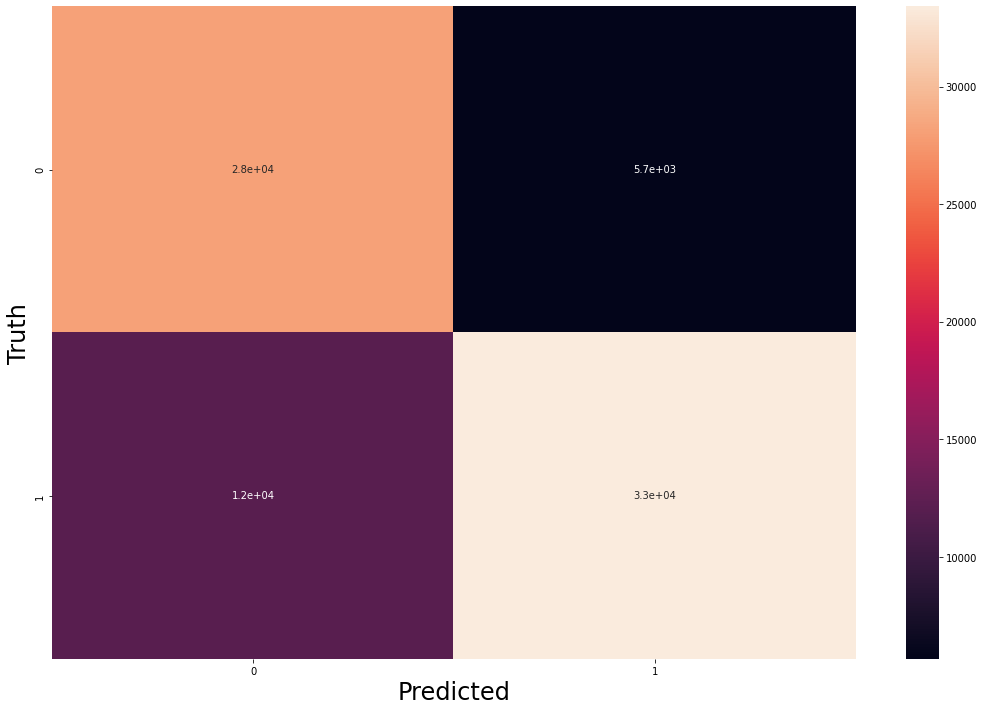

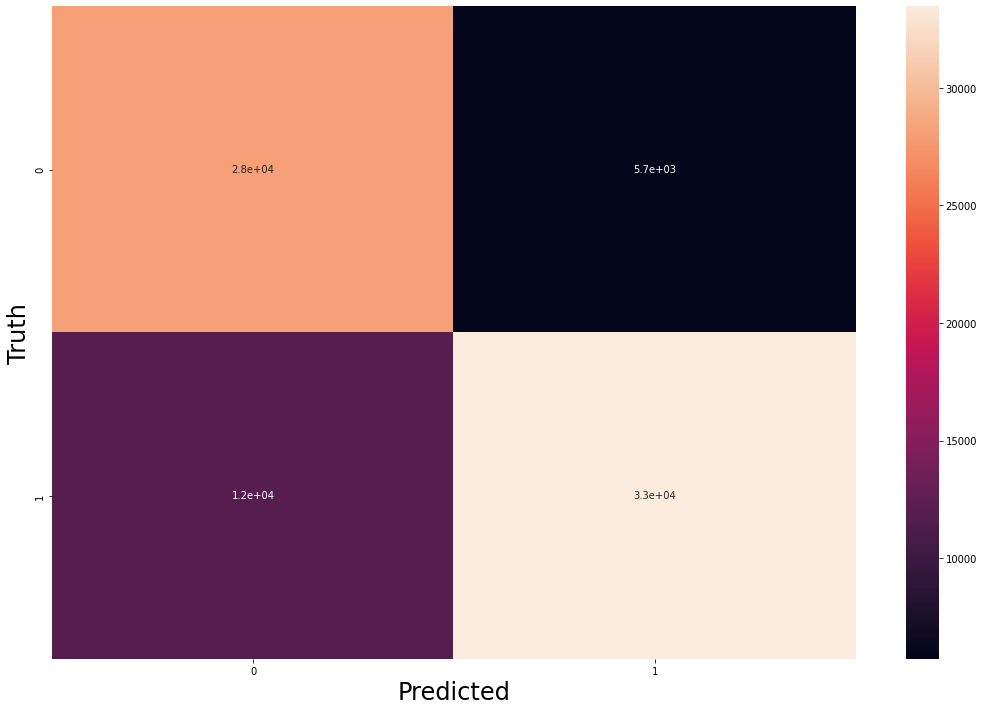

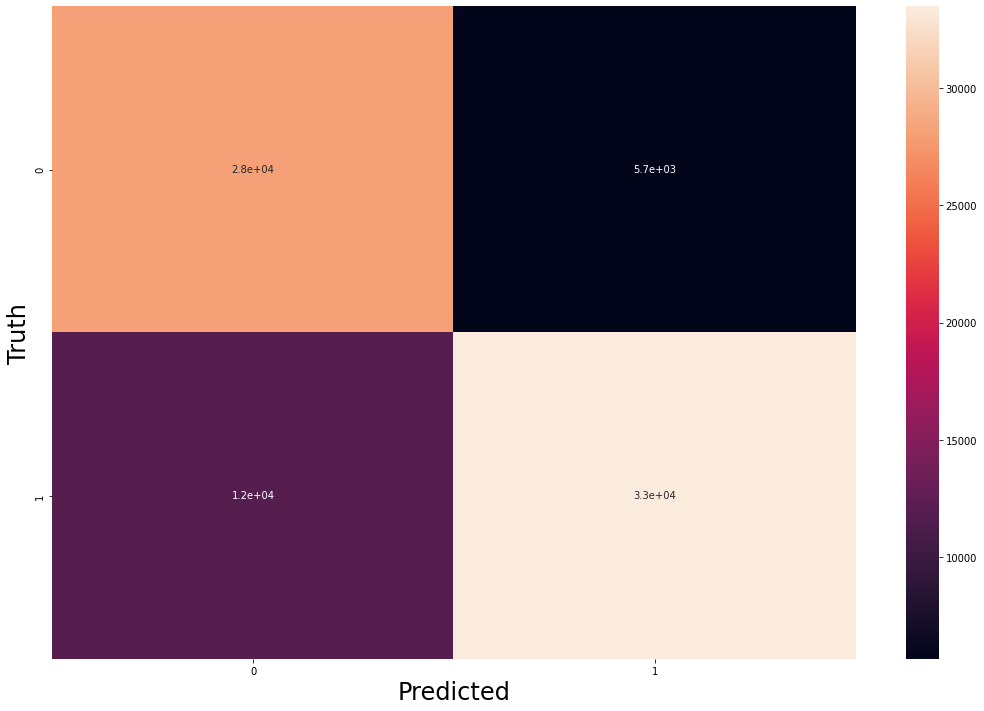

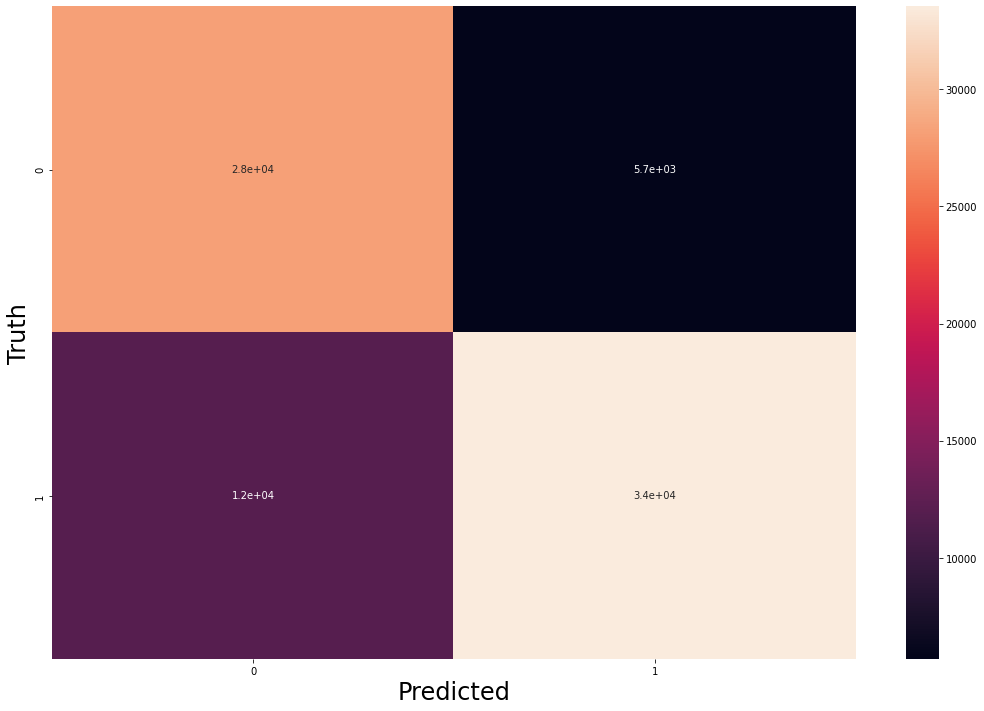

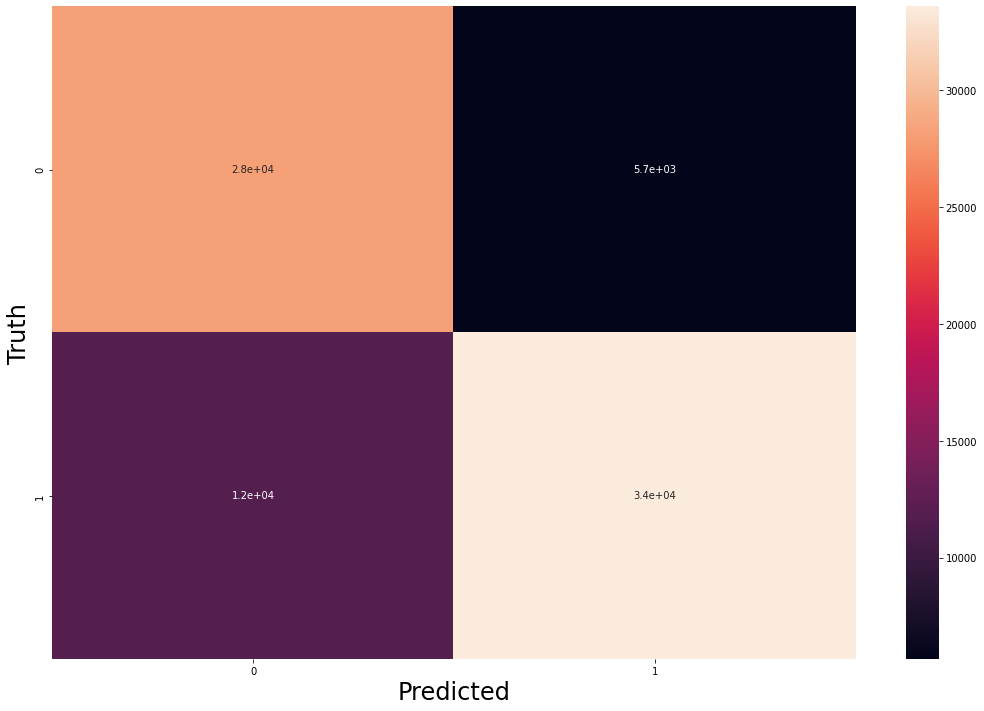

In [ ]:
n=[100,200,300,400,500]
for i in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[i])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.61      0.91      0.73     33821
           1       0.89      0.58      0.70     45435

    accuracy                           0.72     79256
   macro avg       0.75      0.74      0.72     79256
weighted avg       0.77      0.72      0.71     79256

False positive rate FPR: 0.38606059390852765
False negative rate FNR: 0.10897457713643943
FAR: 0.24751758552248354
Accuracy: 0.7166649843544968


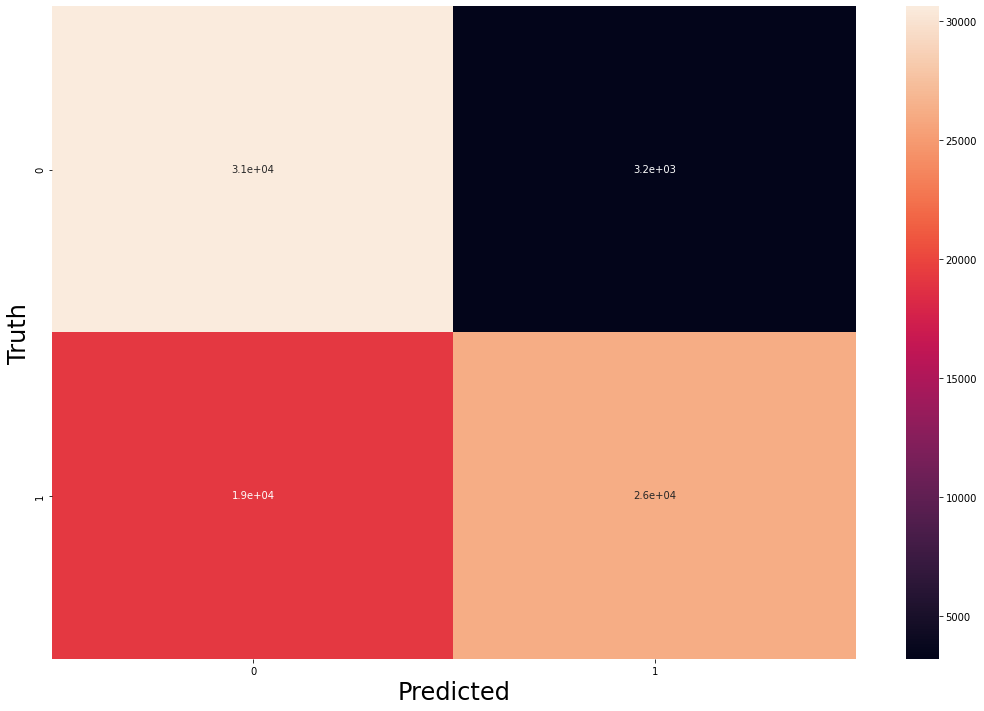

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.7759538710003028
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     34117
           1       0.85      0.74      0.79     45139

    accuracy                           0.78     79256
   macro avg       0.78      0.78      0.78     79256
weighted avg       0.79      0.78      0.78     79256

False positive rate FPR: 0.29680047694753575
False negative rate FNR: 0.14894871794871795
FAR: 0.22287459744812685
Accuracy: 0.7759538710003028


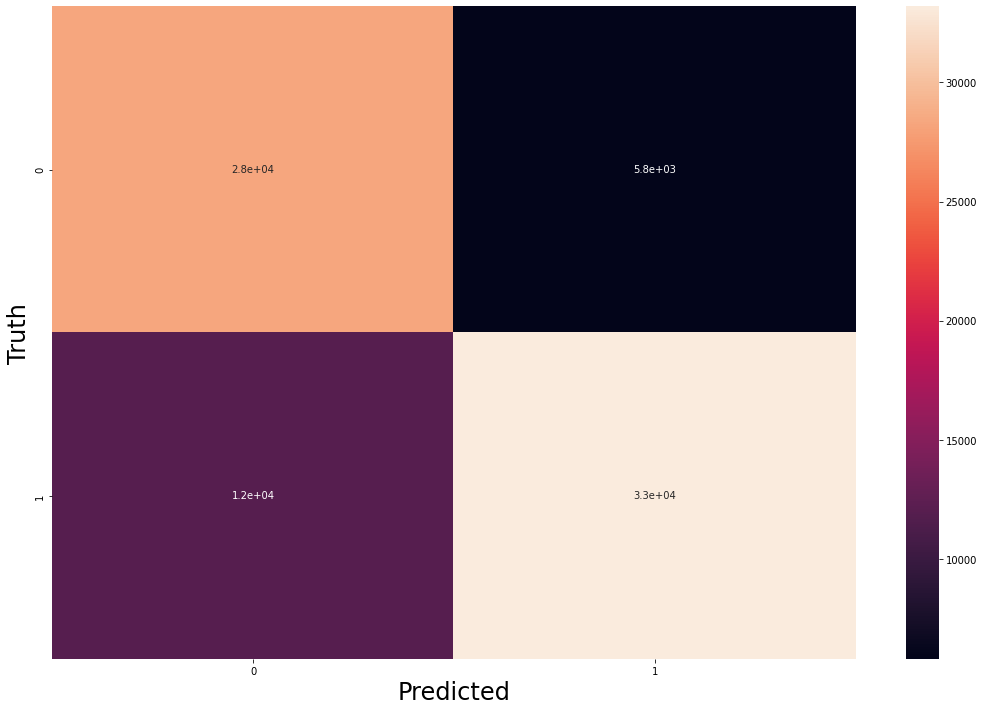

In [36]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.7254466538810942
              precision    recall  f1-score   support

           0       0.62      0.94      0.75     33821
           1       0.93      0.56      0.70     45435

    accuracy                           0.73     79256
   macro avg       0.77      0.75      0.72     79256
weighted avg       0.80      0.73      0.72     79256

False positive rate FPR: 0.3833987509425936
False negative rate FNR: 0.07012383338780549
FAR: 0.22676129216519955
Accuracy: 0.7254466538810942


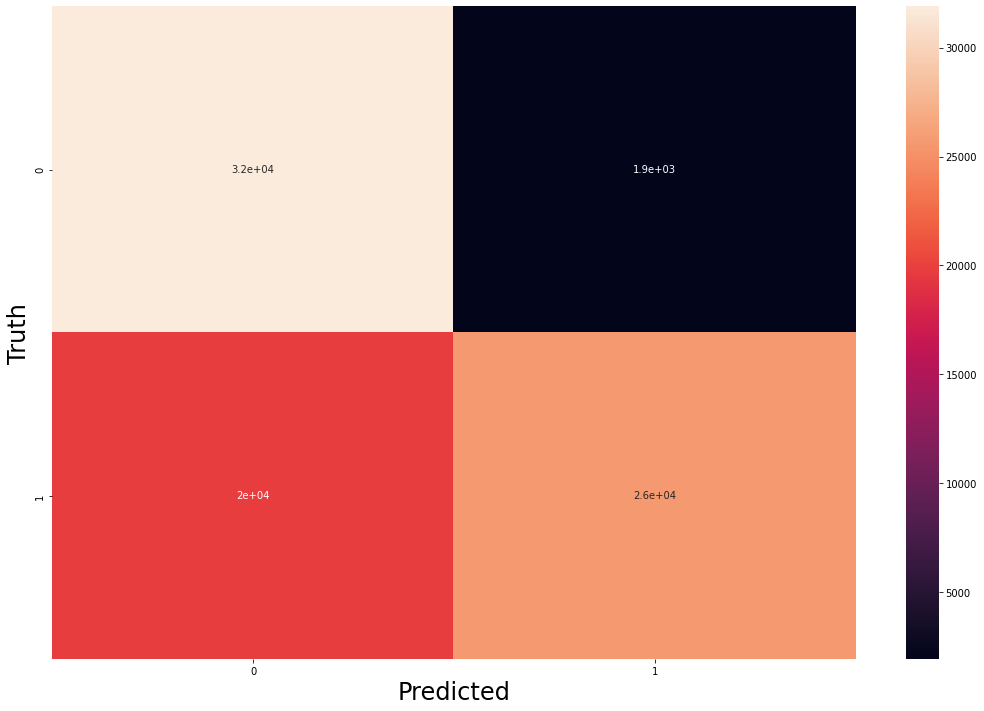

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.7097632986777026
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     33821
           1       0.76      0.72      0.74     45435

    accuracy                           0.71     79256
   macro avg       0.71      0.71      0.71     79256
weighted avg       0.71      0.71      0.71     79256

False positive rate FPR: 0.35184069245096966
False negative rate FNR: 0.23762515205389725
FAR: 0.29473292225243347
Accuracy: 0.7097632986777026
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.7152139901080045
              precision    recall  f1-score   support

           0       0.65      0.73      0.69     

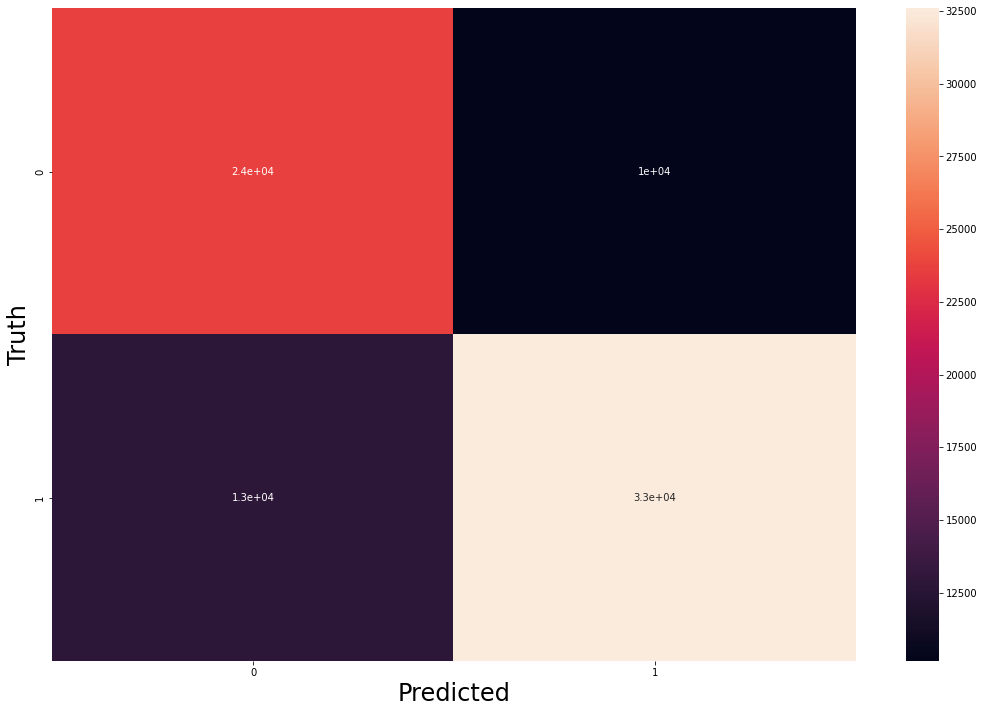

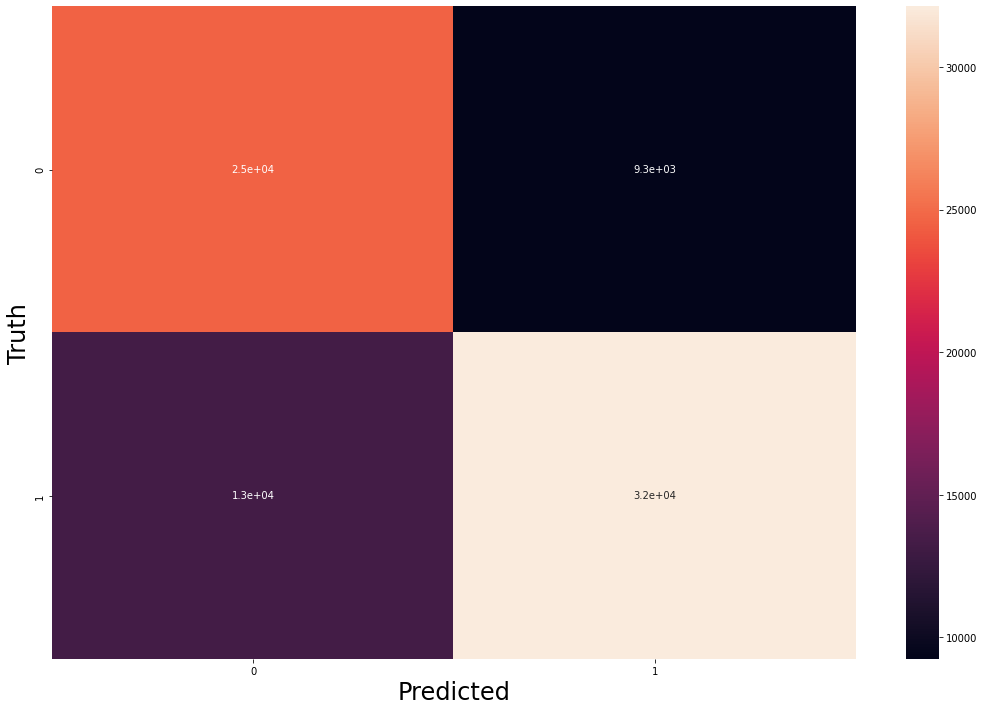

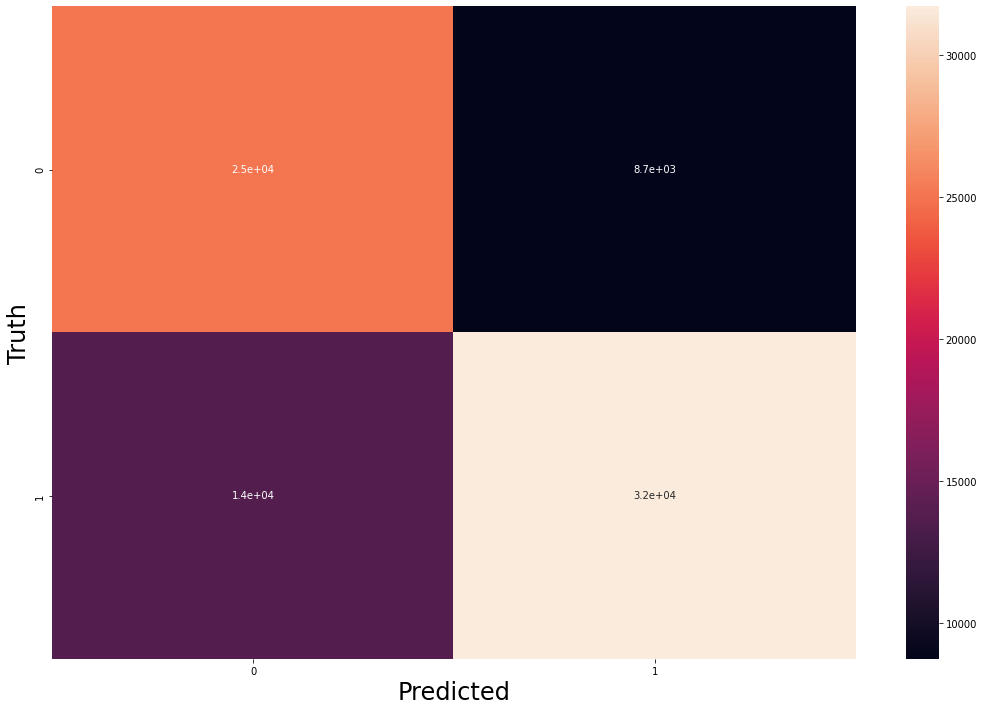

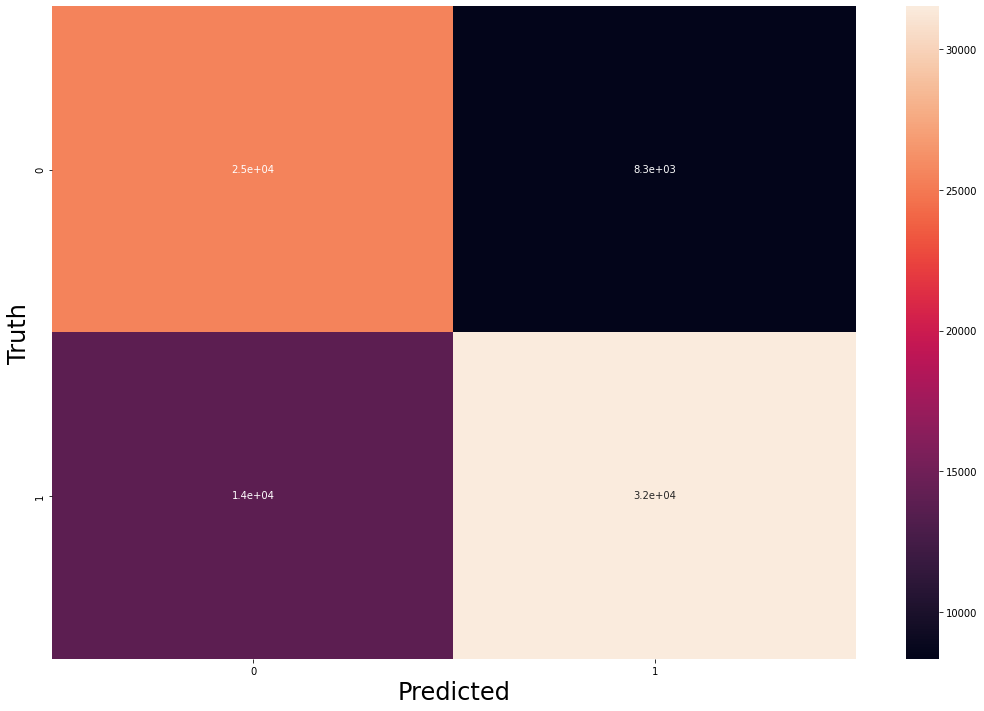

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.7214974260623801
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     34085
           1       0.87      0.61      0.71     45171

    accuracy                           0.72     79256
   macro avg       0.75      0.74      0.72     79256
weighted avg       0.76      0.72      0.72     79256

False positive rate FPR: 0.3738659274193548
False negative rate FNR: 0.1349873577749684
FAR: 0.25442664259716163
Accuracy: 0.7214974260623801


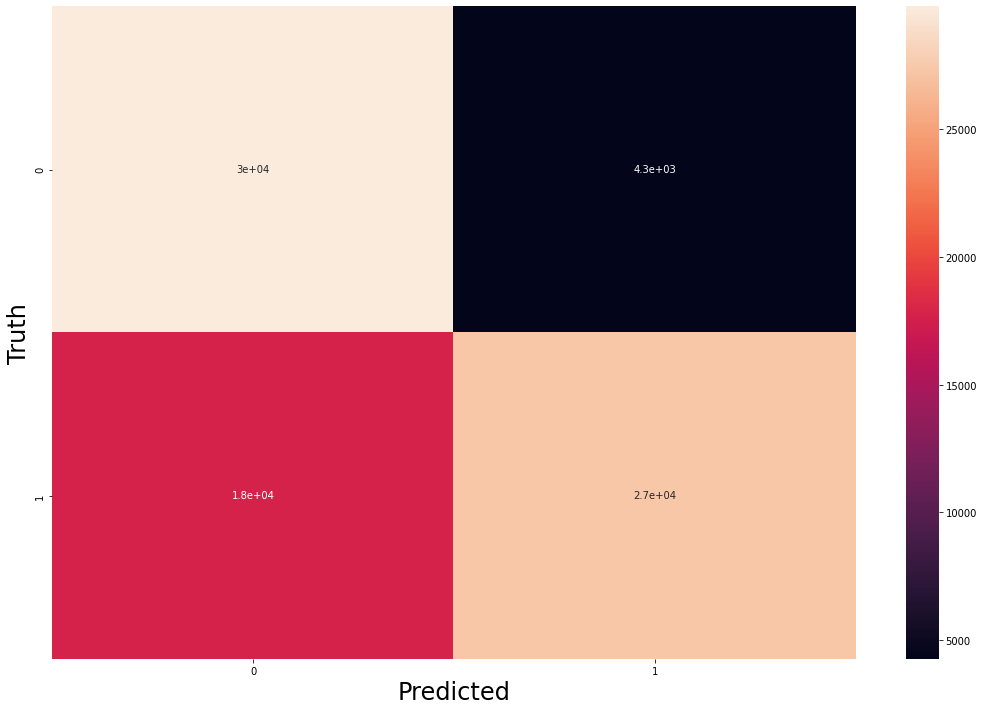

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [18]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.7795 (+/- 0.00)
[0.77778829 0.78005943 0.77915097 0.7790942  0.78132334]


In [19]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.7797 (+/- 0.00)
[0.77608494 0.78064614 0.7795295  0.78011621 0.78206147]


## Modified Evaluation

In [37]:
df_srg=pd.concat([df_trabid_normal_srg,df_trabid_attack_srg],axis='index')
df_srg = df_srg.reset_index()

In [38]:
df_srg=df_srg.sample(frac=1).reset_index(drop=True)
#df_srg = shuffle(df_srg)
df_srg.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_srg.replace({'Label':traffic},inplace=True)

In [39]:
input = df_srg.drop(columns=['Label'])
target = df_srg['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.8018320379529625
              precision    recall  f1-score   support

           0       0.73      0.85      0.79     33985
           1       0.87      0.77      0.82     45271

    accuracy                           0.80     79256
   macro avg       0.80      0.81      0.80     79256
weighted avg       0.81      0.80      0.80     79256

False positive rate FPR: 0.2676024105576322
False negative rate FNR: 0.12978036013924715
FAR: 0.1986

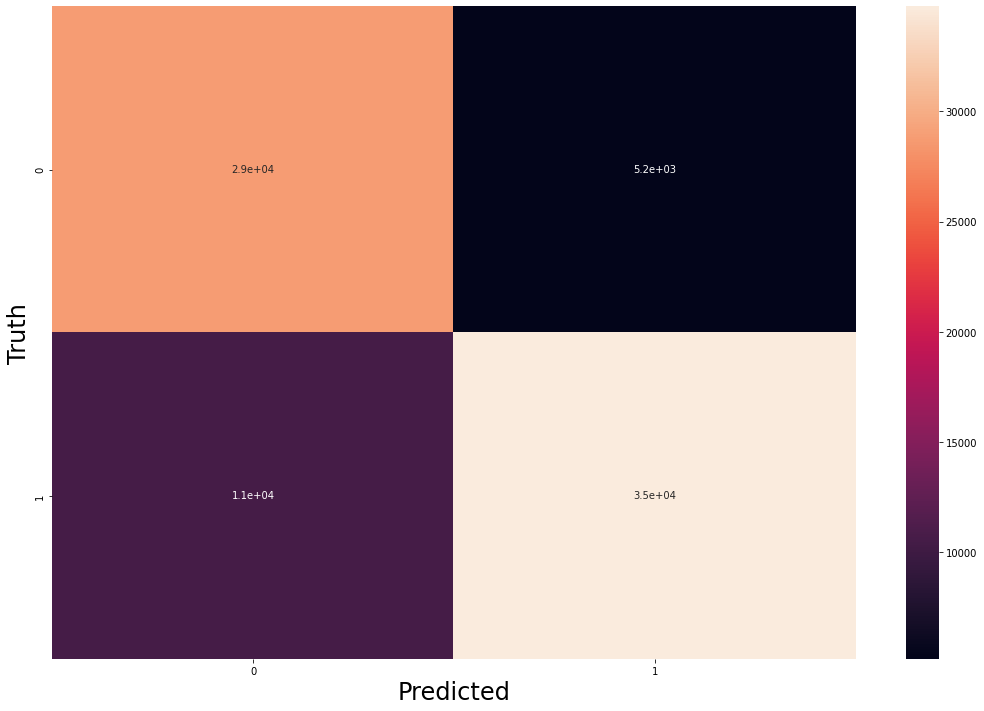

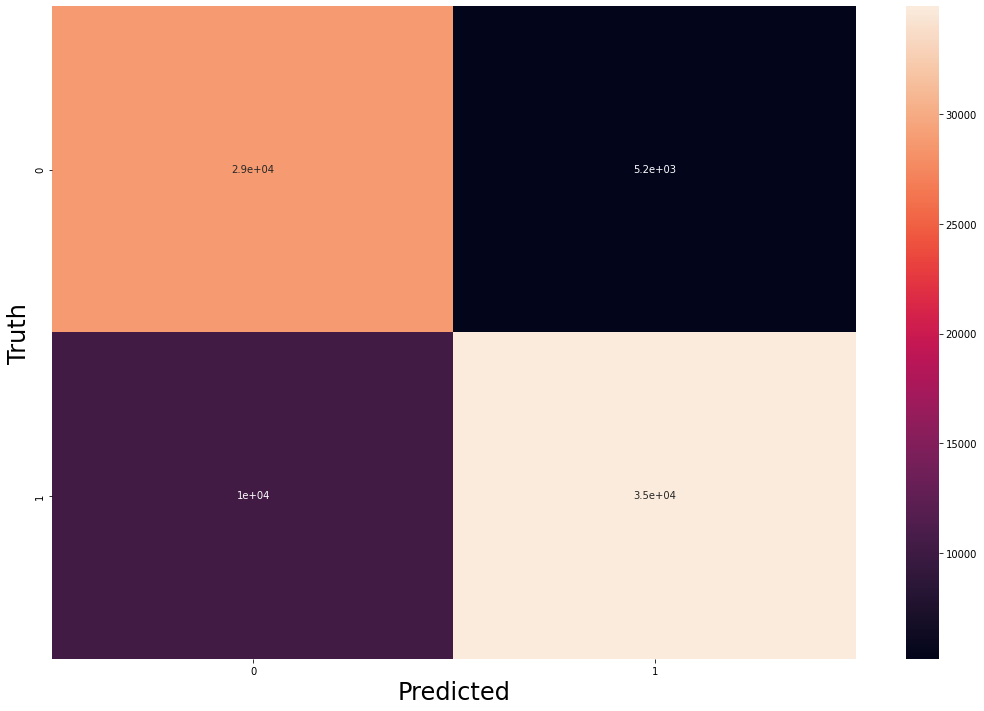

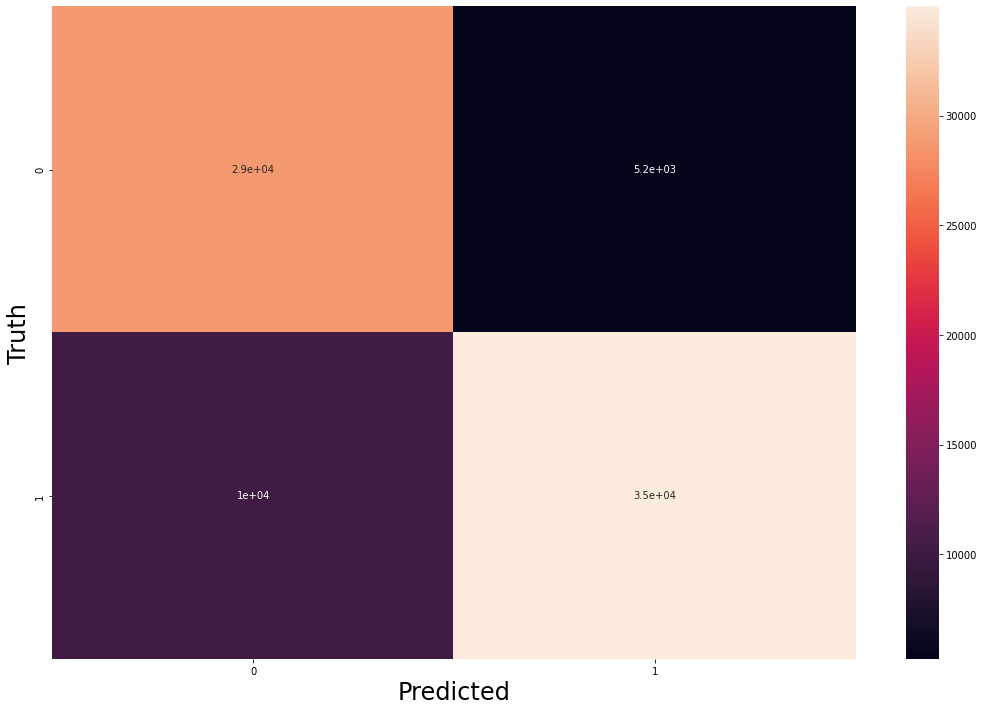

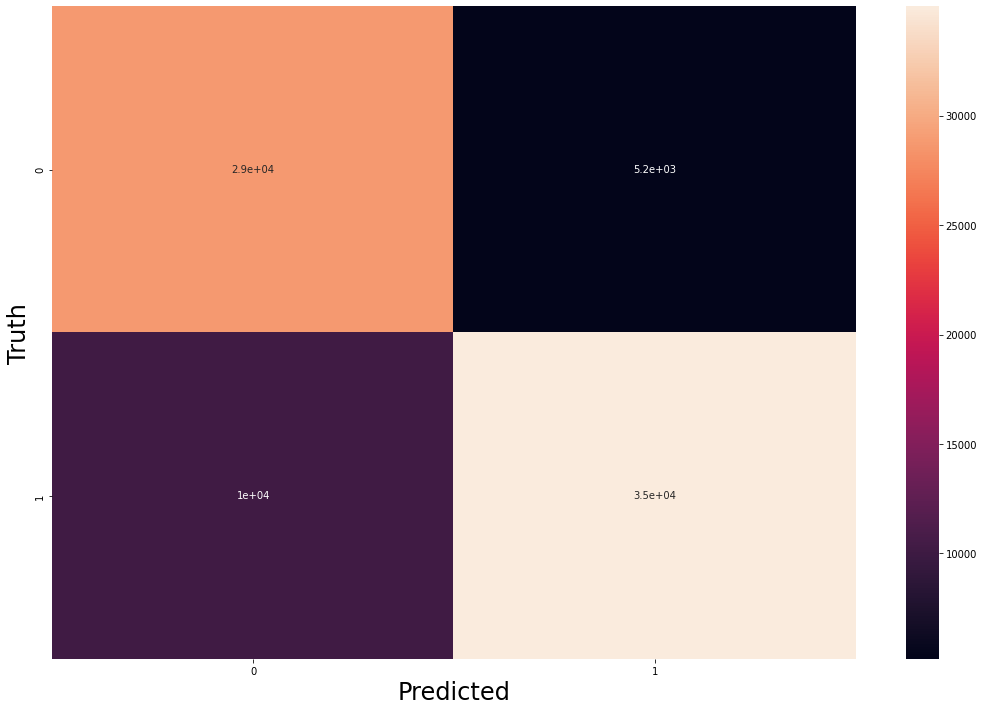

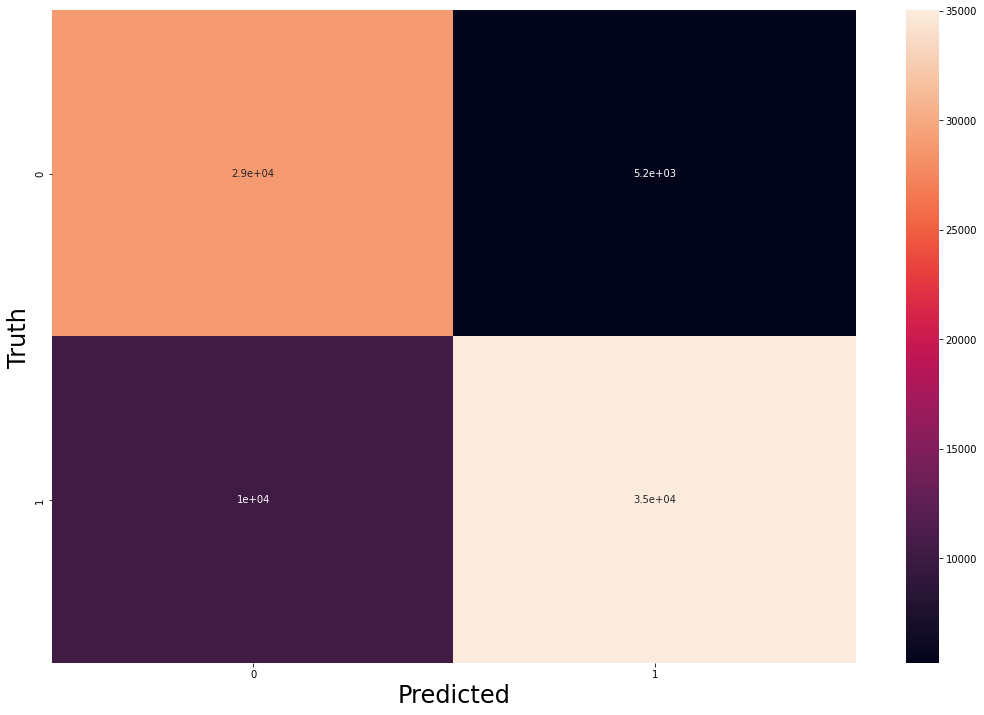

In [ ]:
n=[100,200,300,400,500]
for i in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[i])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.61      0.90      0.73     33985
           1       0.89      0.57      0.70     45271

    accuracy                           0.71     79256
   macro avg       0.75      0.74      0.71     79256
weighted avg       0.77      0.71      0.71     79256

False positive rate FPR: 0.38650490676153737
False negative rate FNR: 0.1125825548369435
FAR: 0.24954373079924044
Accuracy: 0.7144948016553951


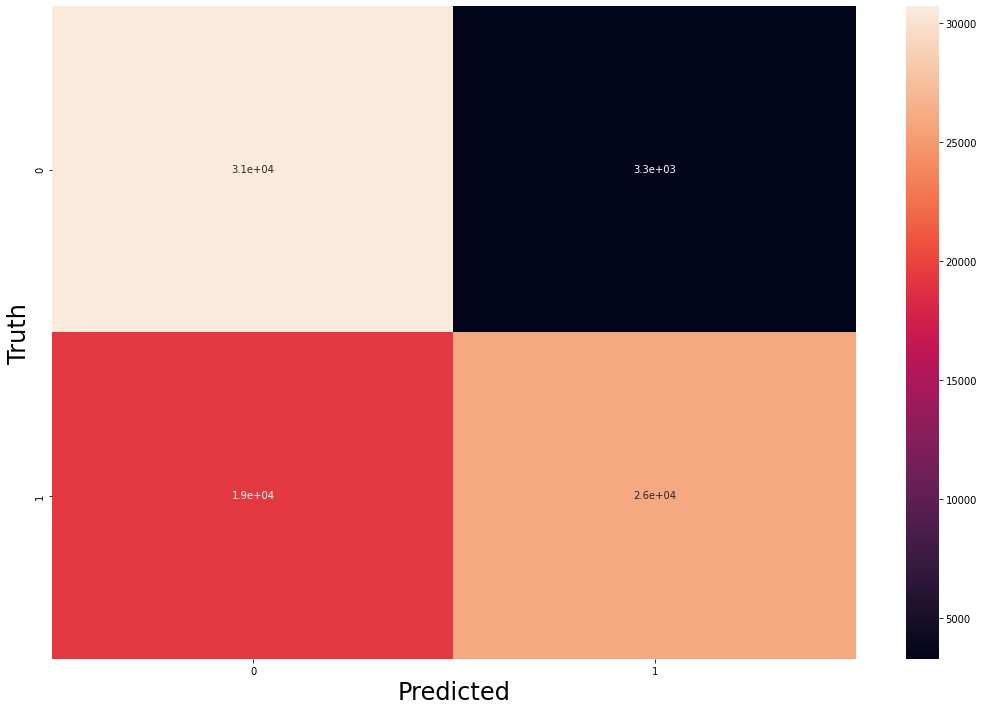

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.7984379731502977
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     34120
           1       0.86      0.78      0.81     45136

    accuracy                           0.80     79256
   macro avg       0.80      0.80      0.80     79256
weighted avg       0.80      0.80      0.80     79256

False positive rate FPR: 0.26355841651247036
False negative rate FNR: 0.14337776690717868
FAR: 0.20346809170982452
Accuracy: 0.7984379731502977


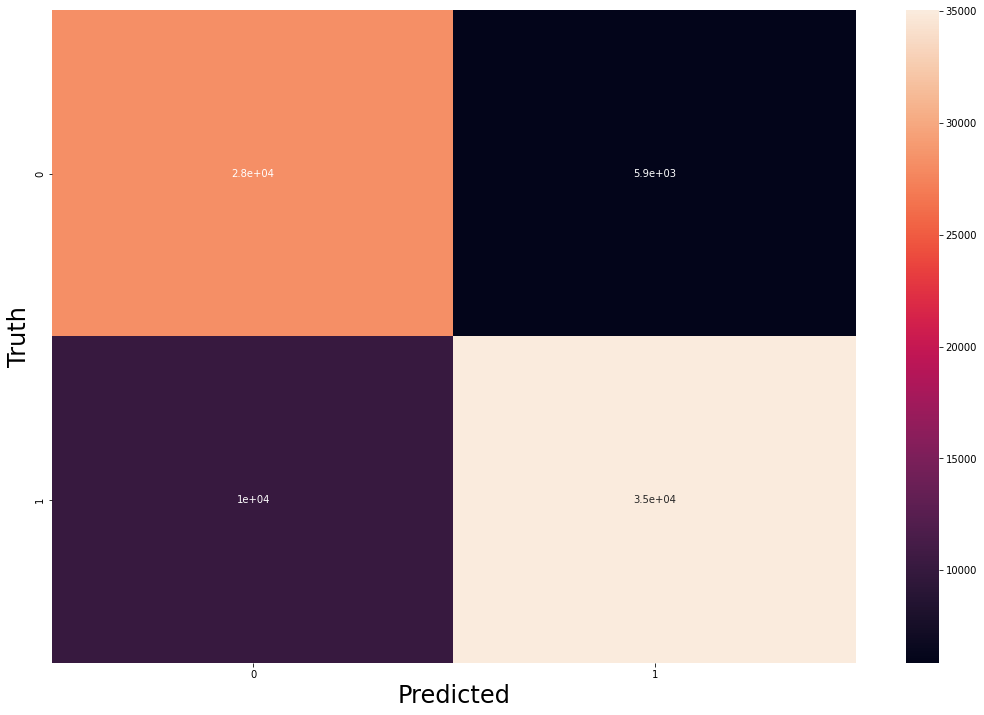

In [40]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.7329792066215807
              precision    recall  f1-score   support

           0       0.63      0.92      0.75     33985
           1       0.91      0.59      0.72     45271

    accuracy                           0.73     79256
   macro avg       0.77      0.76      0.73     79256
weighted avg       0.79      0.73      0.73     79256

False positive rate FPR: 0.3712081642492667
False negative rate FNR: 0.09108487685731732
FAR: 0.23114652055329202
Accuracy: 0.7329792066215807


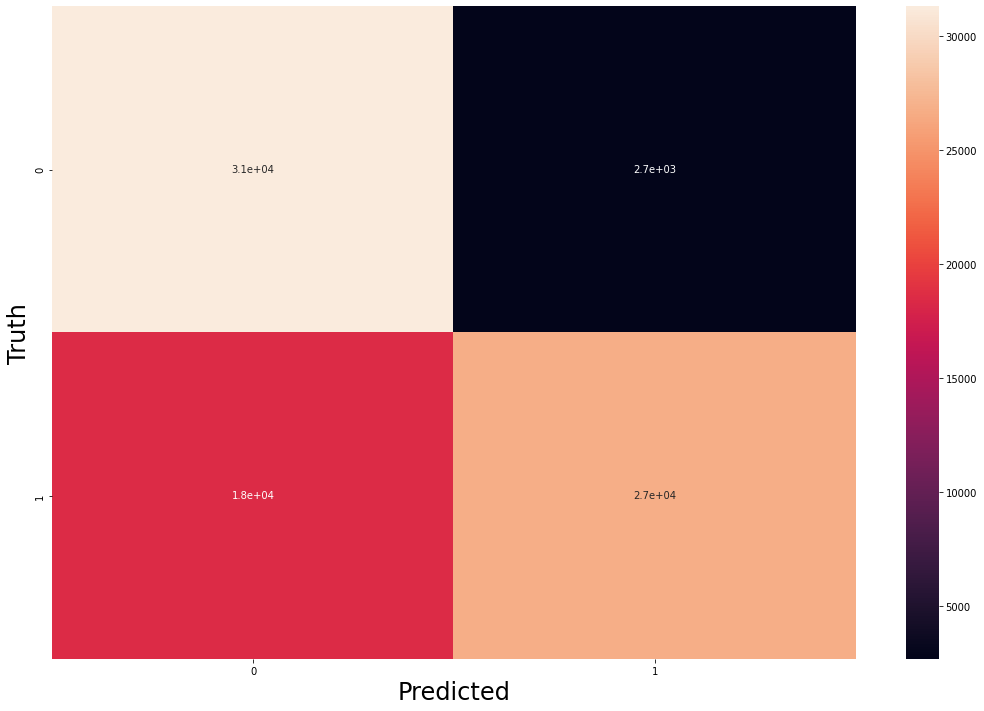

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.7065332593115978
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     33985
           1       0.76      0.71      0.73     45271

    accuracy                           0.71     79256
   macro avg       0.70      0.71      0.70     79256
weighted avg       0.71      0.71      0.71     79256

False positive rate FPR: 0.3543296392872664
False negative rate FNR: 0.24066918001885015
FAR: 0.29749940965305827
Accuracy: 0.7065332593115978
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.7127536085596043
              precision    recall  f1-score   support

           0       0.65      0.73      0.68     3

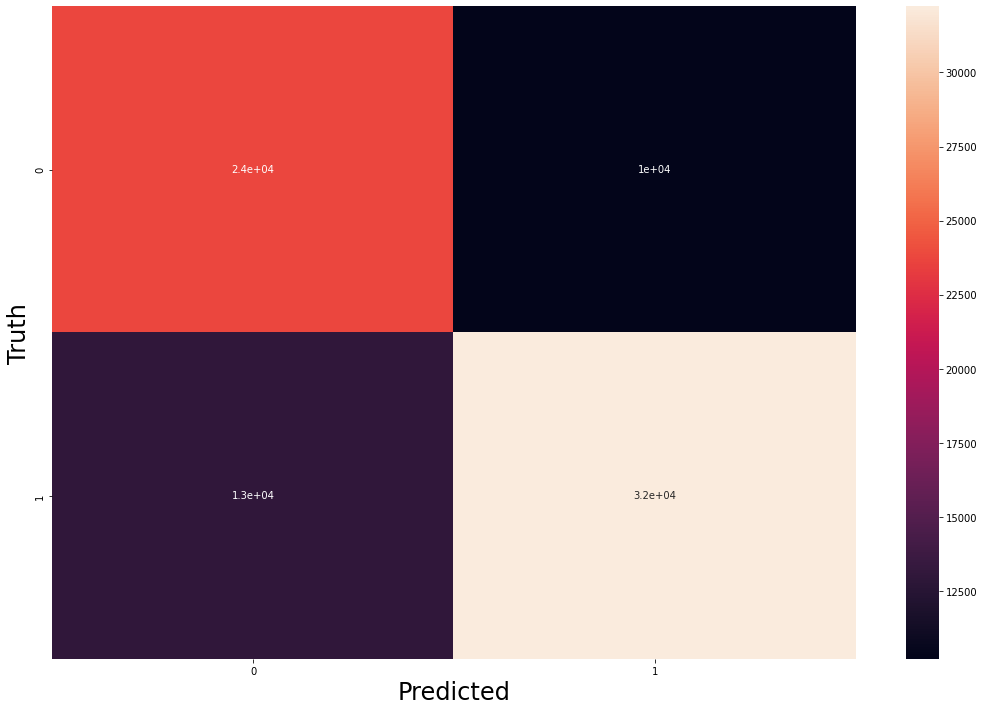

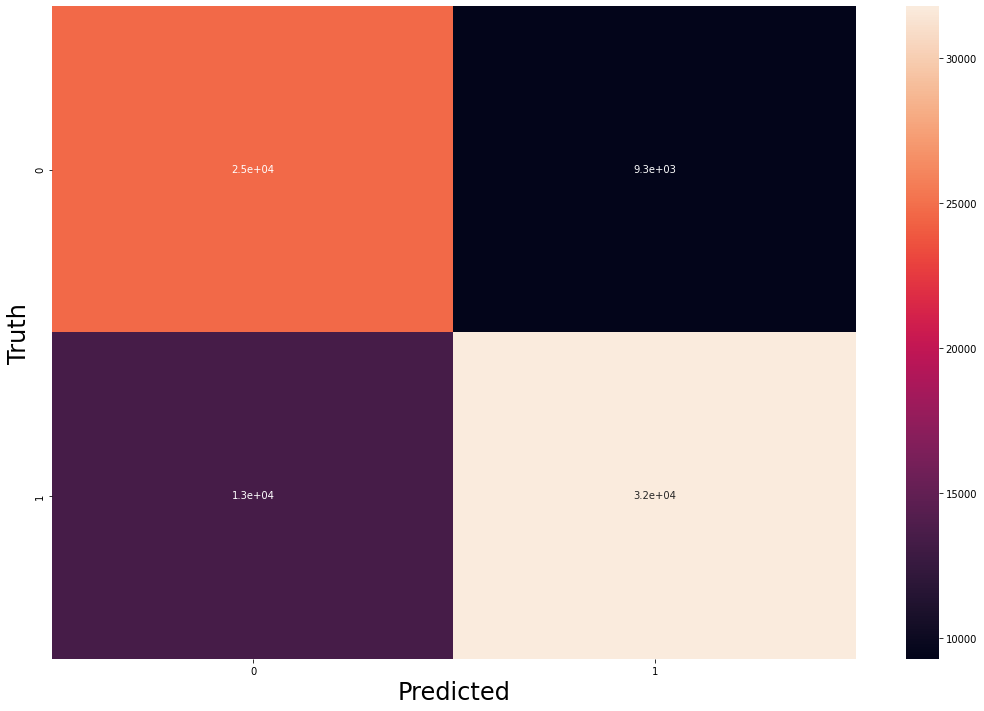

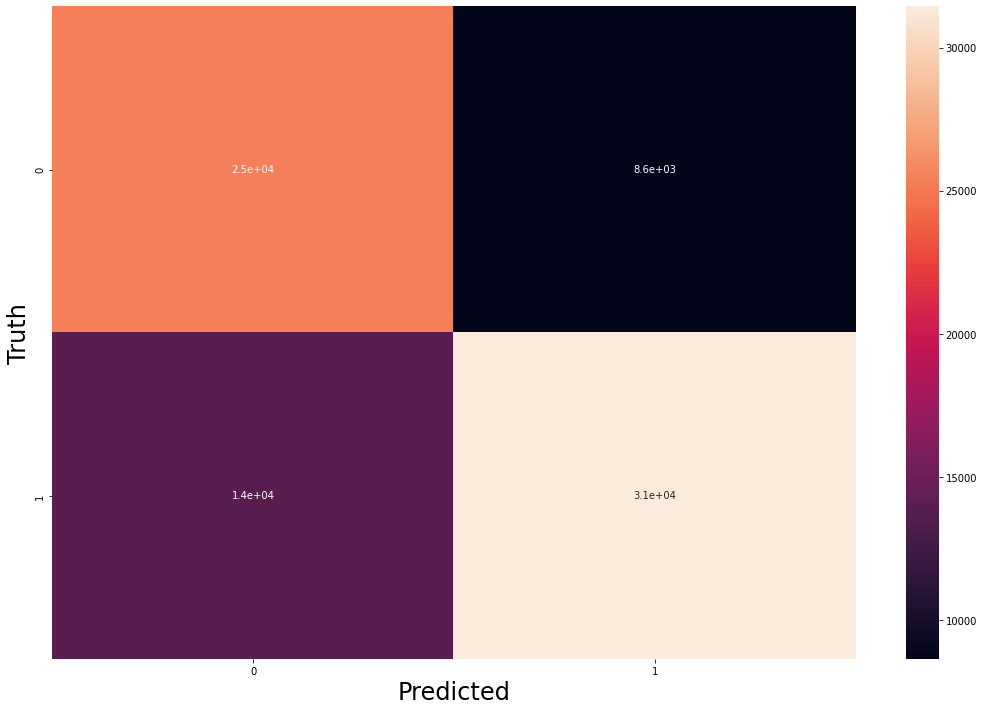

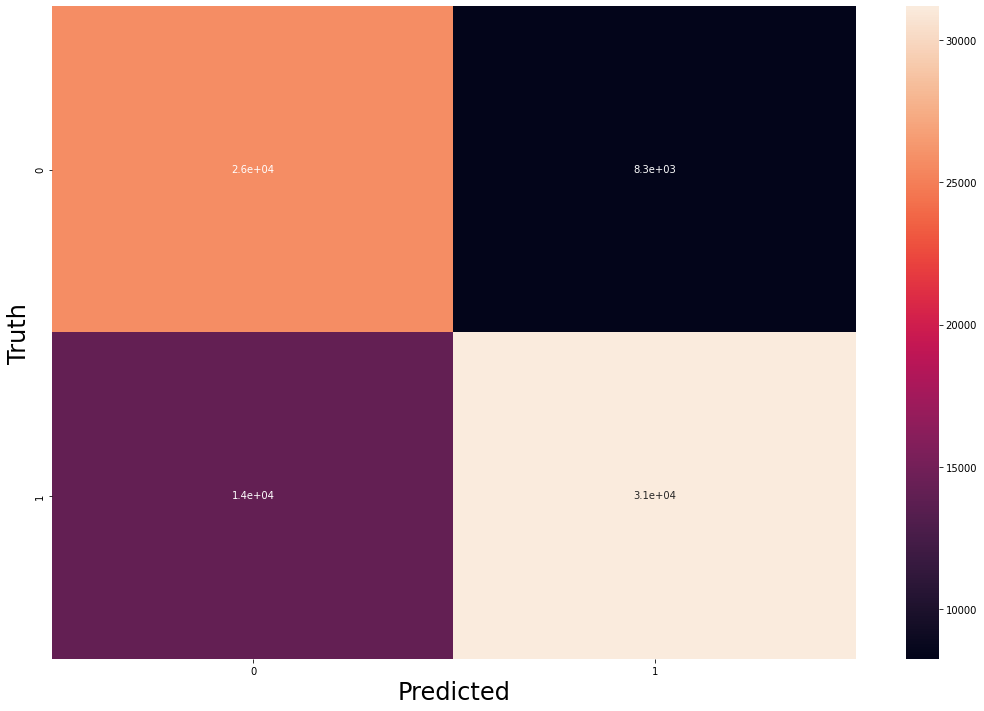

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.7188982537599677
              precision    recall  f1-score   support

           0       0.63      0.86      0.72     33985
           1       0.85      0.61      0.71     45271

    accuracy                           0.72     79256
   macro avg       0.74      0.74      0.72     79256
weighted avg       0.76      0.72      0.72     79256

False positive rate FPR: 0.37486637875742934
False negative rate FNR: 0.14608090634813128
FAR: 0.2604736425527803
Accuracy: 0.7188982537599677


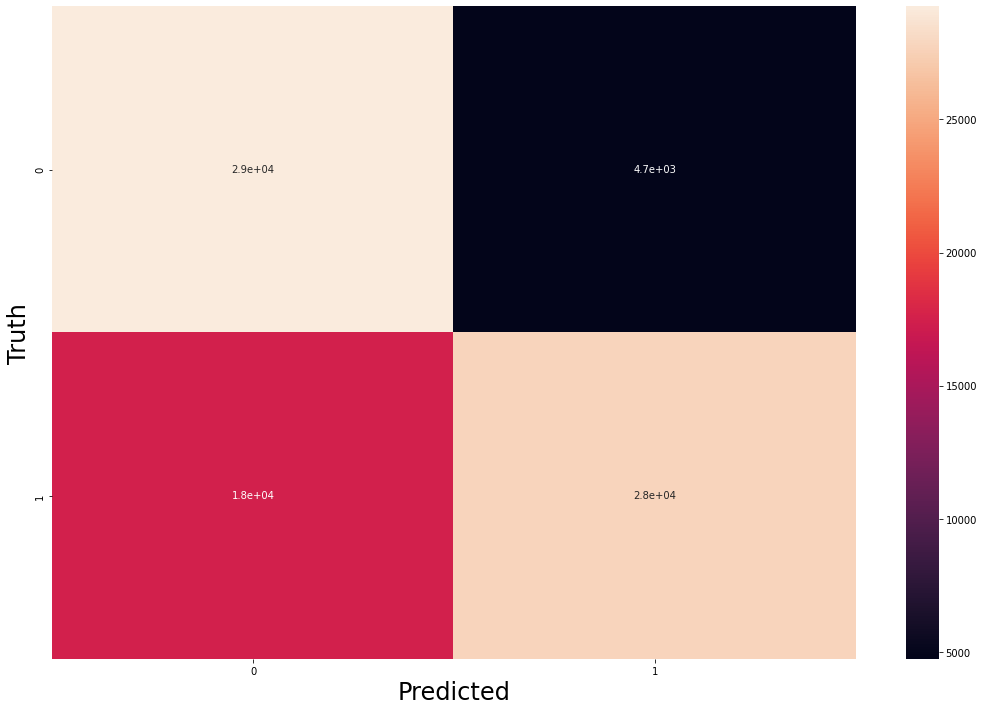

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [23]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.8088 (+/- 0.00)
[0.80971668 0.81106043 0.80708594 0.80988701 0.80604134]


In [24]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.8089 (+/- 0.00)
[0.80877037 0.81166607 0.8076348  0.81024661 0.80607919]


## Retrieve Model

In [ ]:
"""import pickle

filename = 'model.sav'
pickle.dump(model, open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))"""